<a href="https://colab.research.google.com/github/AniketP04/Stock_Price_Prediction/blob/main/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import diff
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv(r'/content/RELIANCE.NS.csv',index_col=0)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
01-01-2015,438.988831,441.812073,437.676270,439.781311,417.988892,1367720
02-01-2015,439.880371,443.818054,437.998199,438.617340,416.882629,3383424
05-01-2015,438.344940,441.267212,432.946106,433.812897,412.316284,4662967
06-01-2015,430.915344,432.401276,412.093750,414.124512,393.603485,8596809
07-01-2015,414.619812,425.367950,414.570282,423.139069,402.171326,9562421


In [ ]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
del df['Volume'],df['Adj Close'],df['Low'],df['High'],df['Open']




In [ ]:
df['close_log'] = np.log(df['Close'])


In [ ]:
df['close_log_diff'] = df['close_log']-df['close_log'].shift(1)

In [ ]:
df.shape

(2024, 3)

In [ ]:
train = df[:2000]
val = df[2000:]
train.shape,val.shape

((2000, 3), (24, 3))

In [ ]:
train

,Close,close_log,close_log_diff
Date,,,
01-01-2015,439.781311,6.086278,NaN
02-01-2015,438.617340,6.083627,-0.002650
05-01-2015,433.812897,6.072613,-0.011014
06-01-2015,414.124512,6.026167,-0.046447
07-01-2015,423.139069,6.047701,0.021534
...,...,...,...
30-01-2023,2359.750000,7.766311,0.009538
31-01-2023,2353.850098,7.763808,-0.002503
01-02-2023,2339.899902,7.757863,-0.005944


((array([-3.39558911, -3.14475678, -3.00564136, ...,  3.00564136,
          3.14475678,  3.39558911]),
  array([-0.14103248, -0.13171223, -0.09030592, ...,  0.11279491,
          0.13730706,         nan])),
 (nan, nan, nan))

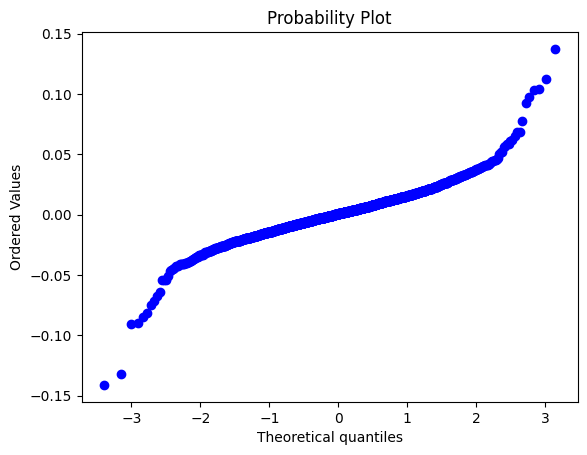

In [ ]:
#plt.hist(df['Close'], bins=20)
stats.probplot(df['close_log_diff'], dist="norm", plot=plt)
#sm.qqplot(df['close_log'], line ='45')

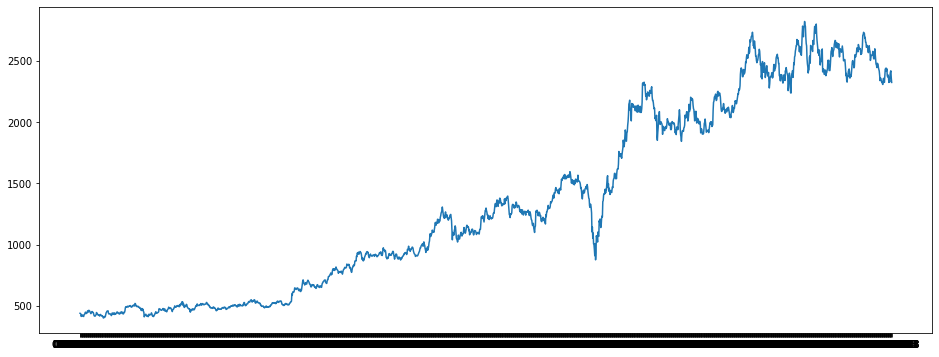

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(df['Close'])

In [ ]:
adfuller(df['close_log_diff'].dropna())

(-13.590299398558415,
 2.0427733995668821e-25,
 10,
 2012,
 {'1%': -3.433604305449515,
  '5%': -2.8629775816425003,
  '10%': -2.5675353062242845},
 -10311.861964827101)

In [ ]:
lag_acf = acf(df['close_log_diff'].dropna(), nlags=30)
lag_pacf = pacf(df['close_log_diff'].dropna(), nlags=50, method='ols')

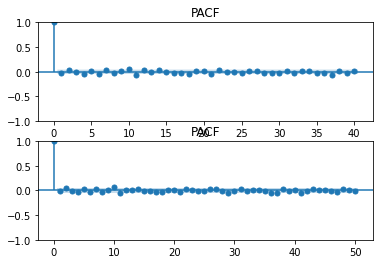

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(df['close_log_diff'].dropna(),ax=pyplot.gca(),lags=40)
plt.title('PACF')
pyplot.subplot(212)
plot_pacf(df['close_log_diff'].dropna(), ax=pyplot.gca(), lags=50)
plt.title('PACF')
pyplot.show()
plt.show()

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.8 MB/s eta 0:00:00


In [ ]:
smodel = auto_arima(train['Close'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(smodel.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18873.701, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18874.763, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18874.805, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18874.125, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18876.604, Time=1.88 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.478 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2000
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9434.851
Date:                Sun, 19 Mar 2023   AIC                          18873.701
Time:                        11:56:10   BIC                          18884.902
Sample:                             0   HQIC                         18877.814
                               - 2000                                  

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:


model = ARIMA(train['Close'], order=(2,0,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -9443.506
Date:                Sun, 19 Mar 2023   AIC                          18895.013
Time:                        11:56:10   BIC                          18917.416
Sample:                             0   HQIC                         18903.239
                               - 2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1328.5663    642.648      2.067      0.039      68.999    2588.133
ar.L1          1.0226      0.016     65.079      0.000       0.992       1.053
ar.L2         -0.0232      0.016     -1.473      0.141      -0.054       0.008
sigma2       737.0299     11.047     66.718      0.000     715.378     758.681
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4064.31
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              21.69   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

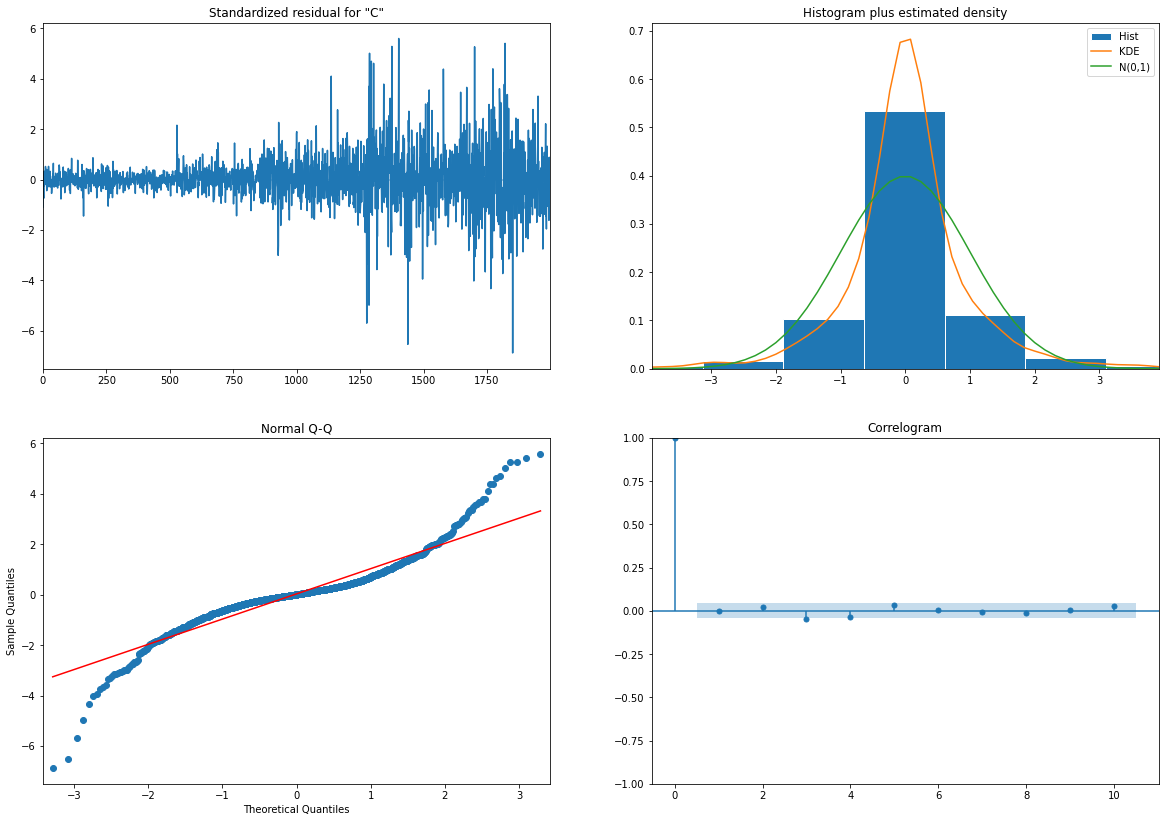

In [ ]:

result.plot_diagnostics(figsize=(20, 14))
plt.show()

In [ ]:
fore=result.predict(start = len(train), end = len(df)-1)
fores=pd.Series(fore)

val['d']=fores.values



<Axes: xlabel='Date'>

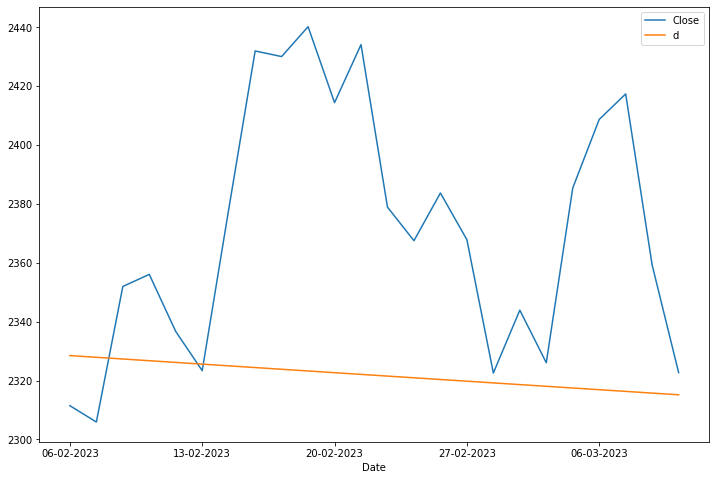

In [ ]:

val[['Close','d']].plot(figsize=(12,8))

In [ ]:
val['d']

Date
06-02-2023    2328.477813
07-02-2023    2327.896347
08-02-2023    2327.313838
09-02-2023    2326.731638
10-02-2023    2326.149776
13-02-2023    2325.568253
14-02-2023    2324.987069
15-02-2023    2324.406224
16-02-2023    2323.825718
17-02-2023    2323.245550
20-02-2023    2322.665720
21-02-2023    2322.086228
22-02-2023    2321.507074
23-02-2023    2320.928258
24-02-2023    2320.349779
27-02-2023    2319.771637
28-02-2023    2319.193832
01-03-2023    2318.616364
02-03-2023    2318.039233
03-03-2023    2317.462438
06-03-2023    2316.885980
08-03-2023    2316.309857
09-03-2023    2315.734070
10-03-2023    2315.158619
Name: d, dtype: float64

In [ ]:
index_future_dates=pd.date_range(start='2023-03-13',end='2023-03-31')
pred=result.predict(start=len(df),end=len(df)+18,).rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2023-03-13    2314.583503
2023-03-14    2314.008723
2023-03-15    2313.434278
2023-03-16    2312.860167
2023-03-17    2312.286391
2023-03-18    2311.712950
2023-03-19    2311.139843
2023-03-20    2310.567070
2023-03-21    2309.994631
2023-03-22    2309.422525
2023-03-23    2308.850753
2023-03-24    2308.279315
2023-03-25    2307.708209
2023-03-26    2307.137437
2023-03-27    2306.566997
2023-03-28    2305.996889
2023-03-29    2305.427114
2023-03-30    2304.857671
2023-03-31    2304.288560
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

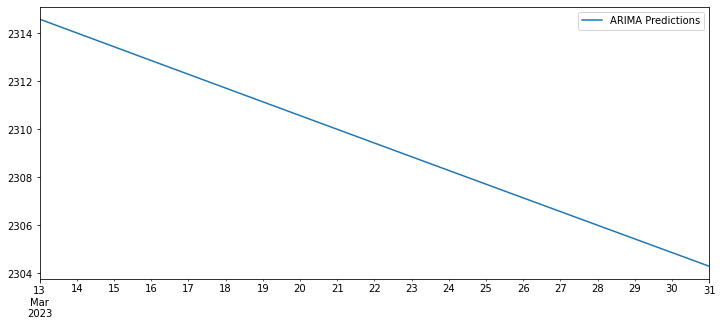

In [ ]:

pred.plot(figsize=(12,5),legend=True)

In [ ]:
https://arxiv.org/abs/1904.05315v1

In [ ]:
!pip install prophet

import prophet



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
df

,Close,close_log,close_log_diff
Date,,,
01-01-2015,439.781311,6.086278,NaN
02-01-2015,438.617340,6.083627,-0.002650
05-01-2015,433.812897,6.072613,-0.011014
06-01-2015,414.124512,6.026167,-0.046447
07-01-2015,423.139069,6.047701,0.021534
...,...,...,...
03-03-2023,2385.399902,7.777122,0.025195
06-03-2023,2408.699951,7.786842,0.009720
08-03-2023,2417.350098,7.790427,0.003585


In [ ]:
df['ds'] = df.index
df['y'] = df['Close']


In [ ]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ur7fl1r/3c6a8m8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ur7fl1r/7by6yo_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71187', 'data', 'file=/tmp/tmp_ur7fl1r/3c6a8m8s.json', 'init=/tmp/tmp_ur7fl1r/7by6yo_b.json', 'output', 'file=/tmp/tmp_ur7fl1r/prophet_modelb3z4zuqs/prophet_model-20230319114428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:44:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:44:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=30, freq='D')
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2049,2023-12-27,2755.086861,2555.196780,2965.302831
2050,2023-12-28,2762.934471,2569.505967,2963.123531
2051,2023-12-29,2763.644262,2559.987856,2946.243928
2052,2023-12-30,2763.355385,2570.990939,2986.708122
2053,2023-12-31,2789.482698,2581.096664,3012.648603


Text(0.5, 1.0, 'Bitcoin price forecast (USD)')

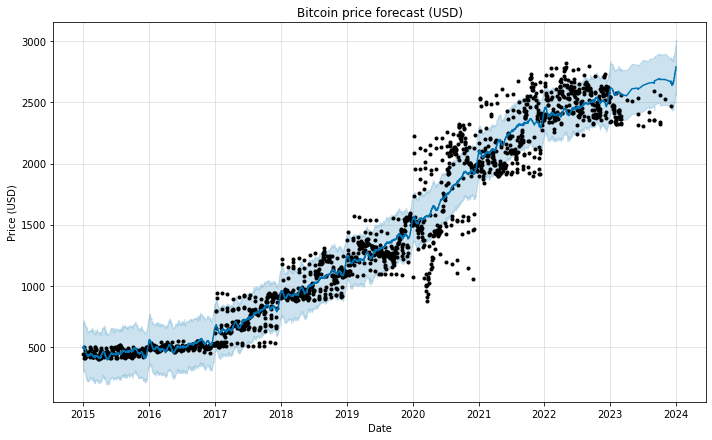

In [ ]:
fig = m.plot(forecast, xlabel='Date', ylabel='Price (USD)');
plt.title('Bitcoin price forecast (USD)')

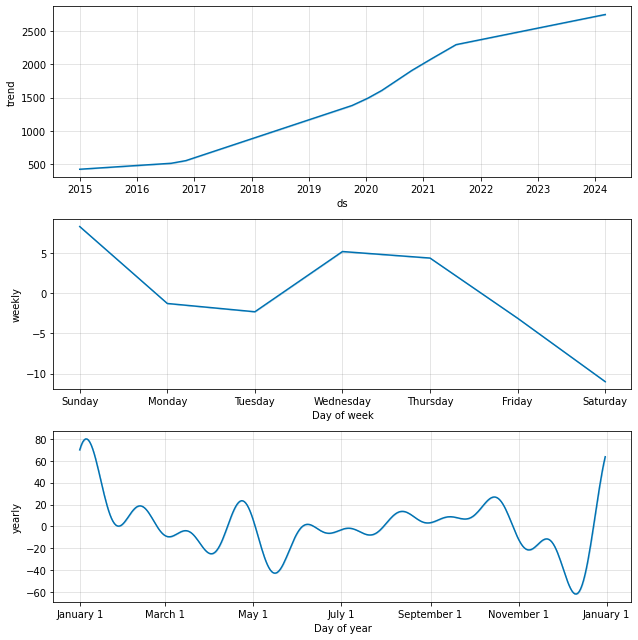

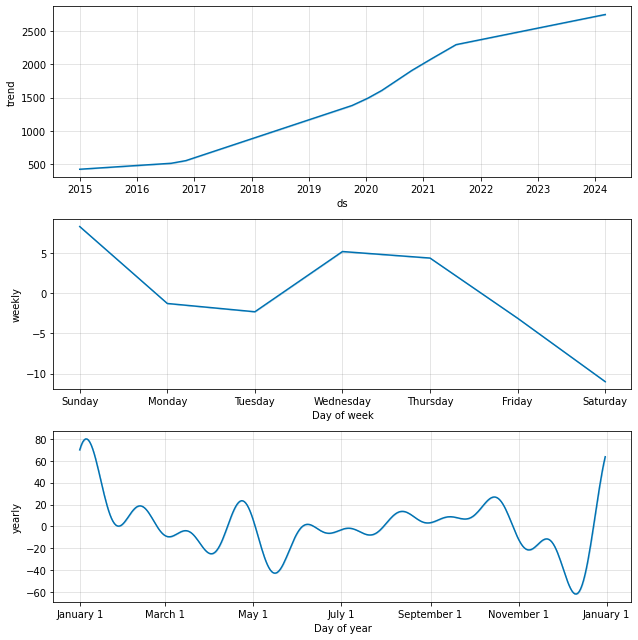

In [ ]:
m.plot_components(forecast)
